
What is the total size of your data? (MB, number of rows, number of variables, etc)

What are other properties? (What is the date range? Is is it geo-data?, then a quick plot of locations, etc.)

Show the fundamental distributions of the data (similar to the work we did on SF crime data)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
df=pd.read_csv('dfMerged.csv')

In [3]:
df['usage_date'] = pd.to_datetime(df['usage_date'])
df=df.drop(columns='name')

In [4]:
df.describe()

,user_id,totalBuyPower,totalProductPower,totalUsePower,totalOnGridPower,night_usage,plantId,dailychargecapacity,dailydischargecapacity,totalSelfUsePower,latitude,longitude
count,394600.000000,3.946000e+05,394600.000000,3.946000e+05,394600.000000,394600.000000,3.946000e+05,394600.000000,394600.000000,394600.000000,392839.000000,392839.000000
mean,901.087841,2.720405e+01,16.046670,3.366367e+01,7.939192,12.341273,1.337656e+08,5.327568,3.679735,8.107479,55.661243,11.860218
std,283.980557,7.097322e+03,19.662792,6.719603e+03,12.555089,13.666908,3.120725e+06,259.452978,3.292890,12.505382,0.332997,0.903610
min,501.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.294294e+08,0.000000,0.000000,0.000000,54.572157,8.114217
25%,670.000000,5.800000e-01,1.030000,8.300000e+00,0.000000,3.936167,1.335822e+08,1.193333,0.772167,0.740000,55.539918,11.752994
50%,851.000000,7.660000e+00,9.290000,1.661000e+01,0.520000,7.728375,1.342137e+08,5.143792,3.494083,5.830000,55.670121,12.163891
75%,1098.000000,2.298000e+01,26.770000,3.188000e+01,12.240000,16.172937,1.345532e+08,6.534104,5.192583,11.710000,55.843226,12.399912
max,1833.000000,4.458331e+06,4060.870000,4.221060e+06,92.020000,930.508750,1.497830e+08,162363.295750,37.435917,4058.030000,57.426306,15.128681


In [7]:
features=['totalBuyPower', 'totalProductPower',
       'totalUsePower', 'totalOnGridPower', 'night_usage', 
       'dailychargecapacity', 'dailydischargecapacity', 'totalSelfUsePower']

In [8]:
print('Number of rows', len(df))
print('Number of variables:', len(features))

Number of rows 394600
Number of variables: 8


In [9]:
file_size_mb = os.path.getsize('dfMerged.csv')/(1024 * 1024)
print(f"File size: {file_size_mb:.2f} MB")


File size: 64.11 MB


In [10]:
unique_values_count = df.nunique()
print(unique_values_count)

user_id                      829
usage_date                   967
totalBuyPower              11842
totalProductPower           8826
totalUsePower              12359
totalOnGridPower            6873
night_usage               273129
plantId                      829
dailychargecapacity       244161
dailydischargecapacity    231878
totalSelfUsePower          15934
address                      828
latitude                     821
longitude                    821
dtype: int64


In [11]:
df.dtypes

user_id                            int64
usage_date                datetime64[ns]
totalBuyPower                    float64
totalProductPower                float64
totalUsePower                    float64
totalOnGridPower                 float64
night_usage                      float64
plantId                            int64
dailychargecapacity              float64
dailydischargecapacity           float64
totalSelfUsePower                float64
address                           object
latitude                         float64
longitude                        float64
dtype: object

In [12]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 user_id                      0
usage_date                   0
totalBuyPower                0
totalProductPower            0
totalUsePower                0
totalOnGridPower             0
night_usage                  0
plantId                      0
dailychargecapacity          0
dailydischargecapacity       0
totalSelfUsePower            0
address                    400
latitude                  1761
longitude                 1761
dtype: int64


In [13]:
df_day=df['usage_date'].value_counts()
df_user=df['user_id'].value_counts()

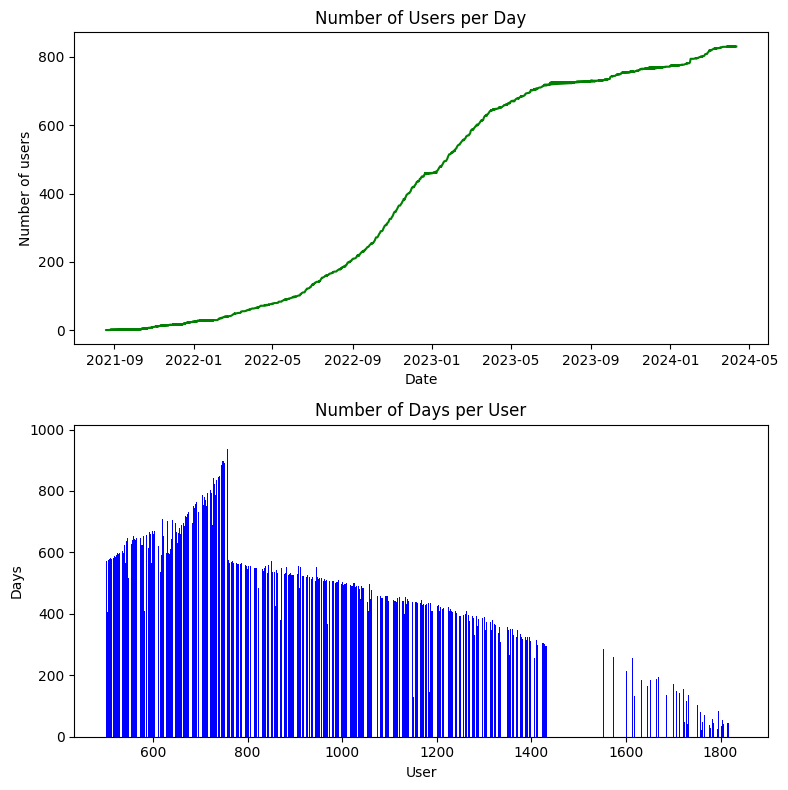

In [14]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot df_day
axs[0].plot(df_day.index, df_day.values,color='green')
axs[0].set_title('Number of Users per Day')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of users')

# Plot df_user
axs[1].bar(df_user.index, df_user.values,color='blue')
axs[1].set_title('Number of Days per User')
axs[1].set_xlabel('User')
axs[1].set_ylabel('Days')

plt.tight_layout()
plt.show()


In [15]:
df_day.describe()

count    967.000000
mean     408.066184
std      311.601473
min        1.000000
25%       72.000000
50%      447.000000
75%      726.000000
max      830.000000
Name: usage_date, dtype: float64

In [16]:
df_user.describe()

count    829.000000
mean     475.995175
std      188.921411
min       15.000000
25%      388.000000
50%      498.000000
75%      583.000000
max      967.000000
Name: user_id, dtype: float64

In [5]:
df[df.totalBuyPower>500]

,user_id,usage_date,totalBuyPower,totalProductPower,totalUsePower,totalOnGridPower,night_usage,plantId,dailychargecapacity,dailydischargecapacity,totalSelfUsePower,address,latitude,longitude
238950,546,2023-08-29,5795.13,0.73,5796.39,0.21,1.285083,134169078,3.927667,2.517167,0.52,"Fåborgvej 31, 4700 Næstved",55.208659,11.756824
253552,999,2022-12-13,4458331.11,0.00,4221059.80,0.00,930.508750,134654033,5.625083,4.031667,0.00,"Tjørnen 308, 2990 Nivå",55.941940,12.500604


In [19]:
df_reduced = df[df.totalBuyPower<150]
df_reduced=df_reduced[df_reduced.totalProductPower<500]
df_reduced=df_reduced[df_reduced.totalUsePower<500]
df_reduced=df_reduced[df_reduced.dailychargecapacity<500]
df_reduced=df_reduced[df_reduced.totalSelfUsePower<500]

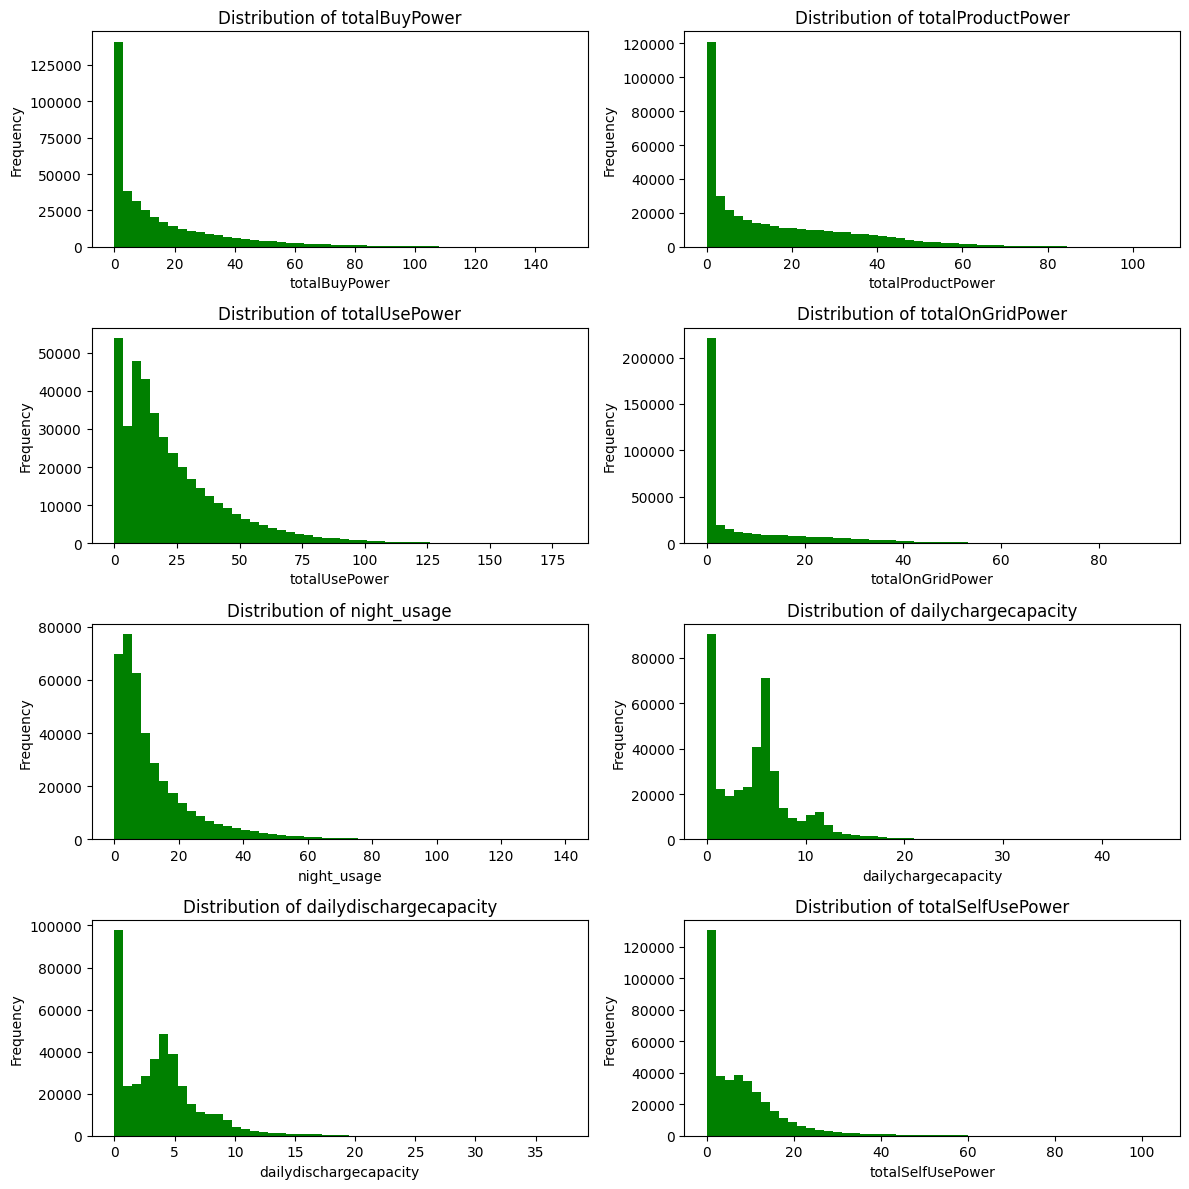

In [20]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    counts, bins, _ = axs[row, col].hist(df_reduced[feature], bins=50)
    non_zero_bins = bins[:-1][counts > 0]
    axs[row, col].hist(df_reduced[feature], bins=non_zero_bins,color='green')
    axs[row, col].set_title(f"Distribution of {feature}")
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel("Frequency")

plt.tight_layout()
plt.show()